In [1]:
import numpy as np
import statsmodels.api as sm
import scipy
import pandas
import pandasql
import matplotlib.pyplot as plt
import datetime
import time as t

In [2]:
df = pandas.read_csv('~/Desktop/Computer Science/Data Science/Udacity Nanodegree/Project 2/turnstile_data_master_with_weather.csv')

# Section 1. Statistical Test

In [3]:
with_rain_data = df['ENTRIESn_hourly'][df['rain'] == 1]
without_rain_data = df['ENTRIESn_hourly'][df['rain'] == 0]
with_rain_mean = np.mean(with_rain_data)
without_rain_mean = np.mean(without_rain_data)
U, p = scipy.stats.mannwhitneyu(with_rain_data, without_rain_data)

print with_rain_mean, without_rain_mean, U, p

1105.44637675 1090.27878015 1924409167.0 0.0249999127935


## 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

I used the Mann-Whitney U-Test, because the data did not seem normally distributed. I used a two-tail P value, because I was just trying to figure out if ridership changed on rainy vs non-rainy days. The null hypothesis was that the ridership did not change significantly during rainy days. My p-critical value was 0.05, or 5%.

## 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

I used the Mann-Whitney U-Test, because the data (as shown on exercise 3.1) seem normally-distributed.  Thus,I needed a non-parametric test that test null hypothesis among two similar populations.

## 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

Mean ridership with rain: 1105.4463767458733
Mean ridership without rain: 1090.278780151855
P-value: 0.024999912793489721

## 1.4 What is the significance and interpretation of these results?

Since 2.5% is below my p-critical value, I can reject the null hypothesis and conclude, with at least 95% confidence, that there is significant difference in ridership when it rains.

# Section 2. Linear Regression

## 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIES n_hourly in your regression model:

I used OLS using Statsmodel.

## 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

I selected the following features for my model:
• rain
• fog
• Hour
• mean wind speed ('meanwindspdi')

I used the default dummy variable provided by the original model: UNIT.

## 2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.

I first selected features based on intuition, then I test them out by adding those features into the model and seeing if it improved my R2 value. I selected fog and mean wind speed, because I figured that people would be less likely to drive and more likely to use the subway if the weather is really bad. I selected mean tempearture because I thought because would be less likely to walk and take the subway if the temperature was really high.

## 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

In [4]:
def linear_regression(features, values):
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    return intercept, params

features = df[['rain','fog','Hour', 'meanwindspdi']]
values = df['ENTRIESn_hourly']

print linear_regression(features, values)

(253.57827882740668, rain            -28.109469
fog             101.489650
Hour             59.498959
meanwindspdi     33.536798
dtype: float64)


In [5]:
def predictions(dataframe):
    features = dataframe[['rain','fog','Hour','meantempi', 'meanwindspdi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    values = dataframe['ENTRIESn_hourly']
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

print predictions(df)

[ 3355.90602719  3625.50380408  3895.10158097 ...,   825.47285908
   825.47285908   825.47285908]


## 2.5 What is your model’s R2 (coefficients of determination) value?

In [6]:
def compute_r_squared(data, predictions):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data, predictions)
    r_squared = r_value**2
    
    return r_squared

print compute_r_squared(df['ENTRIESn_hourly'], predictions(df))

0.458611756916


## 2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2 value?

The closeer the R2 value is to 1, the better the fit of my regression model. To determine its appropriateness for predicting ridership, it might be more useful to plot the residuals.

Populating the interactive namespace from numpy and matplotlib


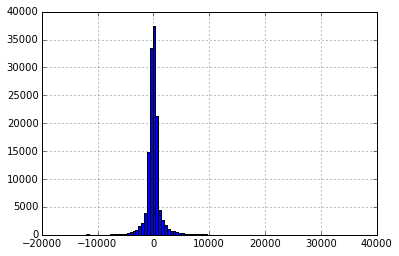

In [7]:
%pylab inline

plt.figure()
(df['ENTRIESn_hourly'] - predictions(df)).hist(bins=100)
plt.show()

The histogram shows that the majority of the predictions are good (shown by the high frequency around '0' residuals in the x-axis). However, there are times where the residuals get higher. However, given the normal distribution of the residuals, it is safe to conclude that a linear model is most appropriate in determining ridership.

# Section 3. Visualization

## 3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

/Users/simonfengou/anaconda/lib/python2.7/site-packages/ggplot/geoms/geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


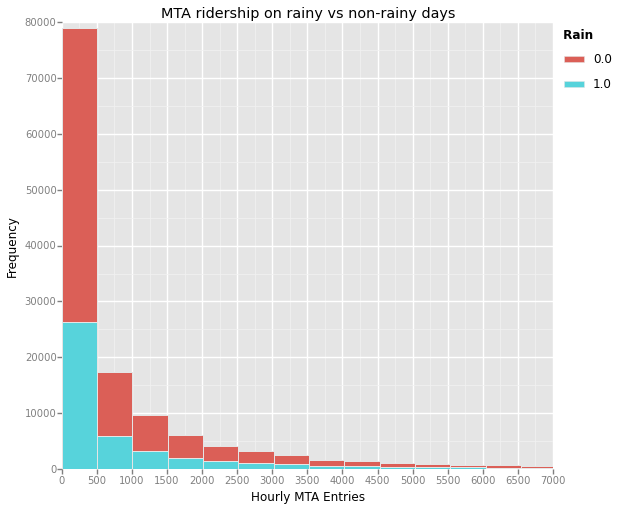

<ggplot: (282123113)>


In [8]:
from ggplot import *

plot = ggplot(aes(x='ENTRIESn_hourly', fill='rain'), data=df)+ geom_histogram(binwidth= 500) + xlim(0, 7000) + \
ggtitle('MTA ridership on rainy vs non-rainy days') + xlab('Hourly MTA Entries') + ylab('Frequency')
    
print plot

At first glance, one might be tempted to conclude that total ridership on rainy days are lower.  However, it is important to consider that the histogram is plotting aggregated data--not taking into consideration that there were more non-rainy days than rainy days. To be specific, there were only 10 rainy days as oppose to 21 non-rainy days.

## 3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like.

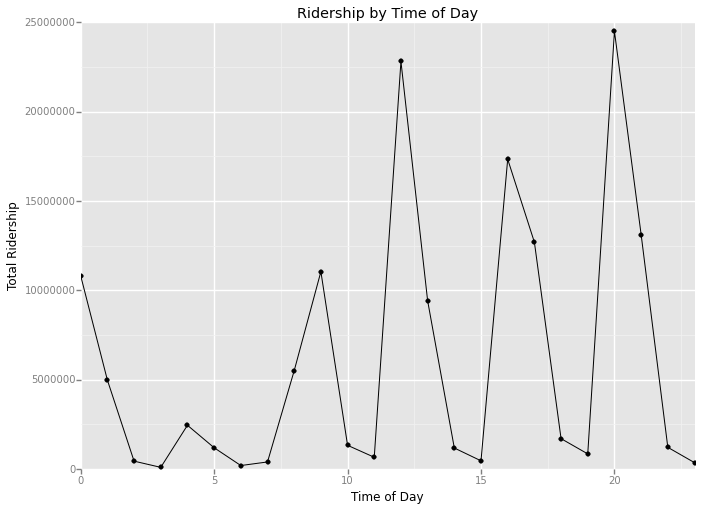

<ggplot: (279646013)>


In [10]:
df_time = pandas.DataFrame(df.groupby('Hour')['ENTRIESn_hourly'].sum())
df_time['Hour'] = df_time.index

plot_2 = ggplot(aes(x='Hour', y='ENTRIESn_hourly'), data=df_time) + geom_point() + geom_line() + \
xlim(0,23) + ylim(0,25000000) + ggtitle("Ridership by Time of Day") + xlab("Time of Day") + ylab ("Total Ridership")

print plot_2

Unsurprisingly, the time of day has a huge effect on overall ridership. There are peaks during rush hour (8-9am and 4-5pm). However, the peak during lunch and late evening (12pm and 8pm) are much higher than the rush hour peaks.  This was surprising to me.

# Section 4. Conclusion

## 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  

From my analysis, I would conclude that more people ride the NYC subway when it is raining.  However, there are other factors that play a much bigger role in ridership volume.

## 4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

The results from the Mann-Whitney U test returns a p-value of 0.025, suggesting that there is a statistically significant different in MTA ridership when it rains versus when it doesn't rain. That, combined with the fact that mean entries with rain (1105.5) is higher than the mean entries without rain (1090.3) led me to conclude that more people ride the NYC subway when it is raining.

However, the linear regression analysis suggest otherwise. The coefficient for the 'rain' parameter is -28.1, suggesting that there's a negative correleation relationship between ridership and rain. However, a closer examination of other parameters suggest that other factors, such as fog, hour, mean wind speed, all have larger weights in affecting subway ridership. Thus, I am inclined to trust the conclusion from the Mann-Whitney U test more, given that it only considers the 'rain' variable.

# Section 5. Reflection

## 5.1 Please discuss potential shortcomings of the methods of your analysis

This dataset is only for the month of May, so naturally, I would not feel confident in extrapolating any preliminary conclusions on the effects on ridership across other months (especially since time of the year has big effects on weather, temperature, holidays, etc.)

From my analysis, I would also be aware of multicollinearity among the features I picked.  For example, rain, fog, and mean wind speed all have strong linear relationship with one another.